<center><h1>Minería de Datos</header1></center>

Presentado por: Melany López, Steven Barragan, Génesis Heredia

Fecha: 15/02/2023

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 KB 41.3 MB/s eta 0:00:00


In [4]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importación de librerias necesarias

In [6]:
#Importamos las librerías correspondientes
# Importamos la librería ImageDataGenerator,
from keras.preprocessing.image import ImageDataGenerator
# Importamos la librería  array_to_img, img_to_array, load_img
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
# Importamos la librería glob
import glob
# Importamos la libreria numpy
import numpy as np
# Importamos la librería plt
import matplotlib.pyplot as plt
# Importamos la librería os
import os
# Configuramos el ambiente
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
#Importamos la libreria shutil
import shutil
#Importamos la libreria random
import random
# Importamos la librería io 
from skimage import io
# Importamos open cv
import cv2
# Importamos remove de la libreria rembg
#from rembg import remove
# Importamos Image de la libreria PIL
from PIL import Image
# Importamos train_test_split de la libreria sklearn
from sklearn.model_selection import train_test_split
# Importamos keras de la libreria tensorflow
from tensorflow import keras
# Importamos Sequential de la libreria keras
from keras.models import Sequential
# Importamos Conv2D,MaxPooling2D,Dense,Flatten,Dropout de la libreria keras
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
# Importamos BatchNormalization de la libreria tensorflow
from tensorflow.keras.layers import BatchNormalization
# Importamos la libreria tensorflow
import tensorflow as tf
# Importamos la libreria visualkeras
import visualkeras
# Importamos early stopping
from keras.callbacks import EarlyStopping
# Importamos GridSearchCV
from sklearn.model_selection import GridSearchCV
# Importamos kerasClassifier
from scikeras.wrappers import KerasClassifier
# Importamos make_score
from sklearn.metrics import make_scorer
# Importamos las metricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Descripción del dataset

El presente dataset incorpora imágenes referente a los distintos tipos de enfermedades de aguacates, cuyo objetivo es la aplicación de las mismas para realizar un modelo para clasificar las enfermedades más comunes de los frutos de aguacate variedad fuerte.

## Descripción del problema
Este dataset contiene varios parámetros/características en donde se requiere realizar un modelo para clasificar las enfermedades más comunes de los frutos de aguacate por medio de la predicción basada en imágenes.

## Carga del dataset

In [7]:
# Definimos la ruta del dataset
folder = '/content/drive/MyDrive/Minería de Datos/ProyectoU3/Aguacates sin fondo Train'

In [8]:
#Se observa los nombres de las carpetas
nombres = os.listdir(folder)
# Imprimimos los nombres
print(nombres)

['Scab', 'Healthy', 'Anthracnose']


## Impresión del dataset

- Dimensiones de la imagen:
(300, 300, 3)


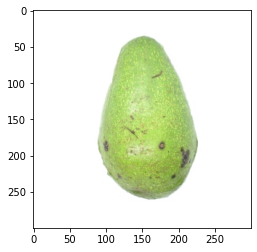

- Dimensiones de la imagen:
(300, 300, 3)


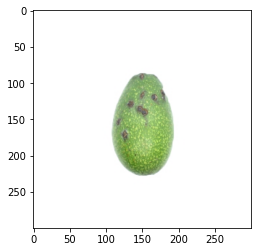

- Dimensiones de la imagen:
(300, 300, 3)


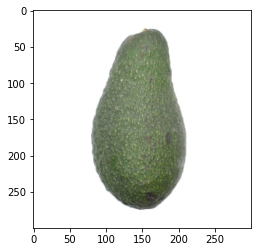

- Dimensiones de la imagen:
(300, 300, 3)


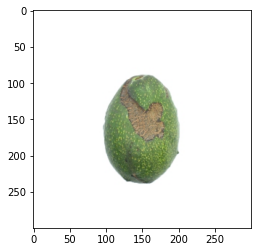

- Dimensiones de la imagen:
(300, 300, 3)


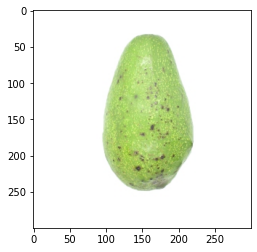

- Dimensiones de la imagen:
(300, 300, 3)


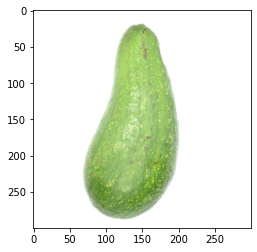

- Dimensiones de la imagen:
(300, 300, 3)


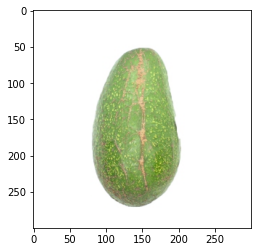

- Dimensiones de la imagen:
(300, 300, 3)


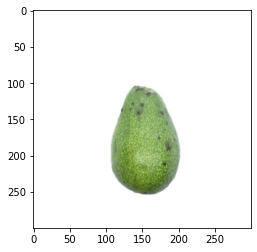

- Dimensiones de la imagen:
(300, 300, 3)


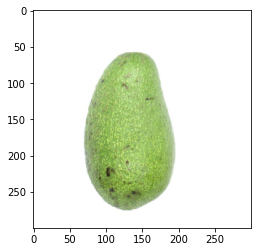

In [9]:
image = []
#Creamos un bucle que se ejecutara hasta que se hayan leido todas las clases
for class_name in nombres:
    # Creamos una ruta especifica con el nombre de la clase
    cur_path = folder+"/" + class_name
    # Obtenemos los elementos de la ruta indicada
    elements = os.listdir(cur_path)
    #Definimos un bucle que lea todos los elementos
    for element in elements:
        image.append(io.imread(folder + "/" + class_name +'/'+ element)/255.0) # imread lee las imagenes con los pixeles codificados como enteros 
        # en el rango 0-255. Por eso la convertimos a flotante y en el rango 0-1
        
for i in range(9):
    print("- Dimensiones de la imagen:")
    ran = random.randint(0, len(image) - 1)
    print(image[ran].shape)
    plt.imshow(image[ran],vmin=0,vmax=1)
    plt.show()

## Selección de caracteristicas

In [10]:
# Definimos la ruta de las imagenes
fpath = '/content/drive/MyDrive/Minería de Datos/ProyectoU3/Aguacates sin fondo Train'
# Inicializamos random_seed
random_seed = 9
# Obtenemos las categorias
categories = os.listdir(fpath)
# Mostramos las categorias
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['Scab', 'Healthy', 'Anthracnose'] 

No. of categories =  3


In [11]:
 """
    Este método permite recorrer los elementos obtenidos de la ruta especificada a través de su categoria.

    Parametros
    -----------
        categories (str): Indica la ruta de cada categoria existente en la carpeta de origen.
        

    Returns:
        img_lst: Retorna la lista de imagenes
        labels: Retorna la lista etiquetas.
"""
def load_images_and_labels(categories):
    # Instanciamos la lista de imagenes
    img_lst=[]
    # Instanciamos la lista de etiquetas
    labels=[]
    # Bucle que recorre las categorias
    for index, category in enumerate(categories):
        # Bucle que recorre la ruta de las imagenes
        for image_name in os.listdir(fpath+"/"+category):
            # Leer las imagenes
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            # Transformamos el espacio de color de las imagenes
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # Genera una arreglo con las imagenes y su formato
            img_array = Image.fromarray(img, 'RGB')
            # Añadimos la imagen a la lista
            img_lst.append(np.array(img_array))
            # Agregamos el indice a las etiquetas
            labels.append(index)
    #Retornamos la lista de imagenes y etiquetas
    return img_lst, labels

# Cargamos las imagenes y las etiquetas
images, labels = load_images_and_labels(categories)
# Mostramos la cantidad de imagenes y etiquetas cargadas
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
# Mostramos el tipo de arreglo creado
print(type(images),type(labels))

No. of images loaded =  1200 
No. of labels loaded =  1200
<class 'list'> <class 'list'>


In [12]:
# Asignamos las medidas de las imagenes
images = np.array(images)
# Asignamos las etiquetas
labels = np.array(labels)
# Imprimimos las medidas de las imagenes y las etiquetas
print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
# Imprimimos el tipo de arreglo generado
print(type(images),type(labels))

Images shape =  (1200, 300, 300, 3) 
Labels shape =  (1200,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


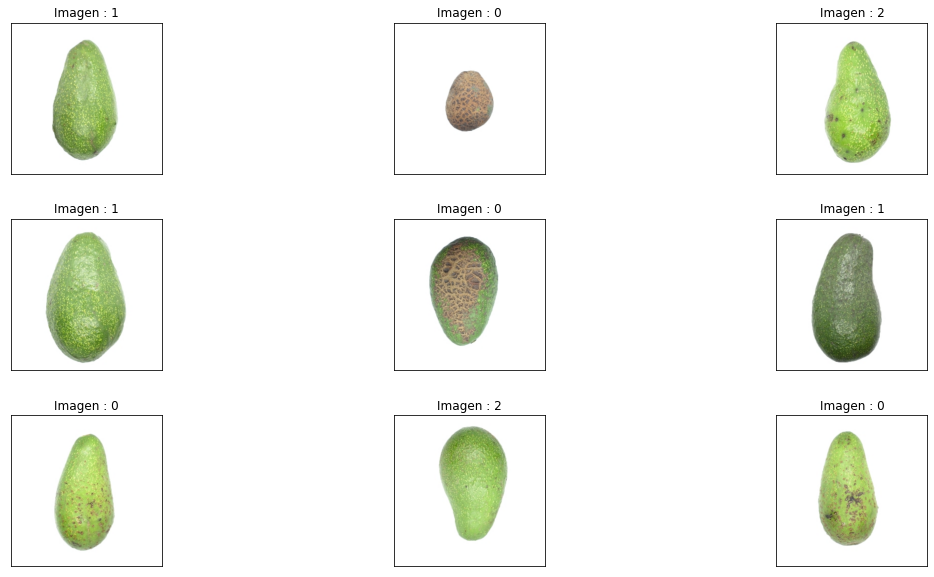

In [13]:
 """
    Este método permite mostrar imagenes de forma aleatoria.

    Parametros
    -----------
        images []: Lista de imagenes cargadas.
        labels []: Lista de etiquétas.
"""
def display_rand_images(images, labels):
    # Definimos la escala de las figuras
    plt.figure(1 , figsize = (19 , 10))
    # Inicializamos un contador
    n = 0 
    # Bucle que recorre 9 veces
    for i in range(9):
        # Incremento del contador
        n += 1 
        # Obtenemos un numero aleatorio
        r = np.random.randint(0 , images.shape[0] , 1)
        # Establecemos la forma de presentar las imagenes
        plt.subplot(3 , 3 , n)
        # Ajustamos la forma de mostrar las imagenes
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        # Mostramos las imagenes
        plt.imshow(images[r[0]])
        # Definimos la etiqueta de las imagenes
        plt.title('Imagen : {}'.format(labels[r[0]]))
        # Establecemos la medida x
        plt.xticks([])
        # Establecemos la medida y
        plt.yticks([])
    #Mostramos la gráfica generada
    plt.show()
    
# LLamamos al metodo para mostrar las imagenes
display_rand_images(images, labels)

Despues realizar la clasificación de las imagenes asignandole un label podemos distinguir que se han asignado de la siguiente manera:

Scab = 0 <br>
Healthy = 1 <br>
Anthracnose = 2 <br>

## Preparación de la Data para el entrenamiento del modelo CNN

In [14]:
#obtener números igualmente espaciados en un rango dado
n = np.arange(images.shape[0])
# Mostramos los valores
print("'n' Valores antes de reorganizarlos = ",n)

# llamamos a la función random_seed
np.random.seed(random_seed)
#mezclar todos los valores igualmente espaciados en la lista 'n'
np.random.shuffle(n)
# Mostramos los valores despues de reorganizarlos 
print("\n'n' Valores después de reorganizarlos = ",n)

'n' Valores antes de reorganizarlos =  [   0    1    2 ... 1197 1198 1199]

'n' Valores después de reorganizarlos =  [ 57  30 304 ... 638 348 382]


In [15]:
# Imágenes aleatorias y datos de etiquetas correspondientes a la lista de imagenes
images = images[n]
# Imágenes aleatorias y datos de etiquetas correspondientes a la lista de etiquetas
labels = labels[n]
# Impromimos los detalles de ambas listas
print("Forma de las imágenes después de barajar = ",images.shape,"\nForma de las etiquetas después de barajar = ",labels.shape)

Forma de las imágenes después de barajar =  (1200, 300, 300, 3) 
Forma de las etiquetas después de barajar =  (1200,)


In [16]:
# Cambiamos el formato de las imagenes
images = images.astype(np.float32)
# Cambiamos el formato de las etiquetas
labels = labels.astype(np.int32)
# Dividimos el valor de las imagenes para 255
images = images/255
# Mostramos el valor de las imagenes después de normalizarlas
print("Forma de las imágenes después de normalizarlas = ",images.shape)

Forma de las imágenes después de normalizarlas =  (1200, 300, 300, 3)


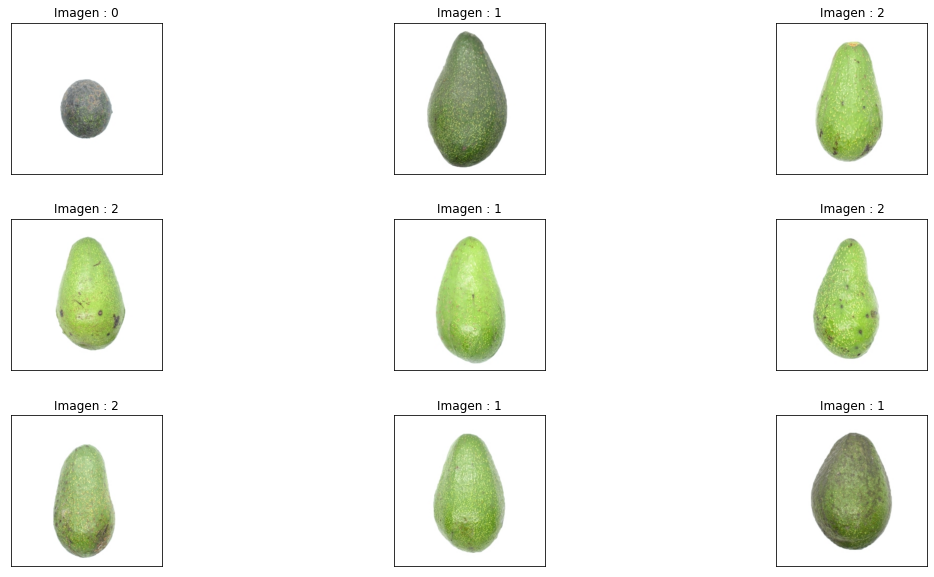

In [17]:
# Mostramos las imagenes de manera aleatoria
display_rand_images(images, labels)

Ahora que las imagenes han sido normalizadas se ha cambia el rango de valores de intensidad de píxeles. Para evitar imagenes con poco contraste debido al deslumbramiento, por ejemplo.

## División del dataset en datos de entrenamiento y datos de test

In [18]:
# Definimos los datos de entrenamiento y prueba
X_train, X_test, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)
# Mostramos la forma de las imágenes de entrenamiento
print("train_ds shape = ",X_train.shape)
# Mostramos la forma de las etiquetas de entrenamiento
print("train_labels shape = ",train_labels.shape)
# Mostramos la forma de las imágenes de prueba
print("\ntest_ds shape = ",X_test.shape)
# Mostramos la forma de las etiquetas de prueba
print("test_labels shape = ",test_labels.shape)

train_ds shape =  (960, 300, 300, 3)
train_labels shape =  (960,)

test_ds shape =  (240, 300, 300, 3)
test_labels shape =  (240,)


In [19]:
## Redimencionamos las imagenes de entrenamiento
X_train = tf.image.resize(X_train, (227, 227))
## Redimencionamos las imagenes de prueba
X_test = tf.image.resize(X_test, (227, 227))

## Early Stooping

In [20]:
# early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Modelo AlexNet CNN
## Definición de las capas AlexNET CNN

In [21]:
# Instanciamos el modelo
model=Sequential()

#Agregamos la primera capa convolucional
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#Agregamos la primera capa max pool
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

# Agregamos la normalización al modelo
model.add(BatchNormalization())

#Agregamos la segunda capa convolucional
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la segunda capa max pool
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
# Agregamos la normalización al modelo
model.add(BatchNormalization())

#Agregamos la tercera capa convolucional
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la cuarta capa convolucional
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la quinta capa convolucional
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la tercera capa max pool
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
# Agregamos la normalización al modelo
model.add(BatchNormalization())

# Redimencionamos el modelo
model.add(Flatten())

#Añadimos la primera capa de densidad
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))
# Omitir aleatoriamente neuronas
model.add(Dropout(0.4))
# Normalizamos el modelo
model.add(BatchNormalization())

# Añadimos la segunda capa de densidad
model.add(Dense(4096,activation="relu"))
# Omitir aleatoriamente neuronas
model.add(Dropout(0.4))
# Normalizamos el modelo
model.add(BatchNormalization())

# Añadimos la tercera capa de densidad
model.add(Dense(1000,activation="relu"))
# Omitir aleatoriamente neuronas
model.add(Dropout(0.4))
# Normalizamos el modelo
model.add(BatchNormalization())

# Capa de salida
model.add(Dense(26,activation="softmax"))
# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                        

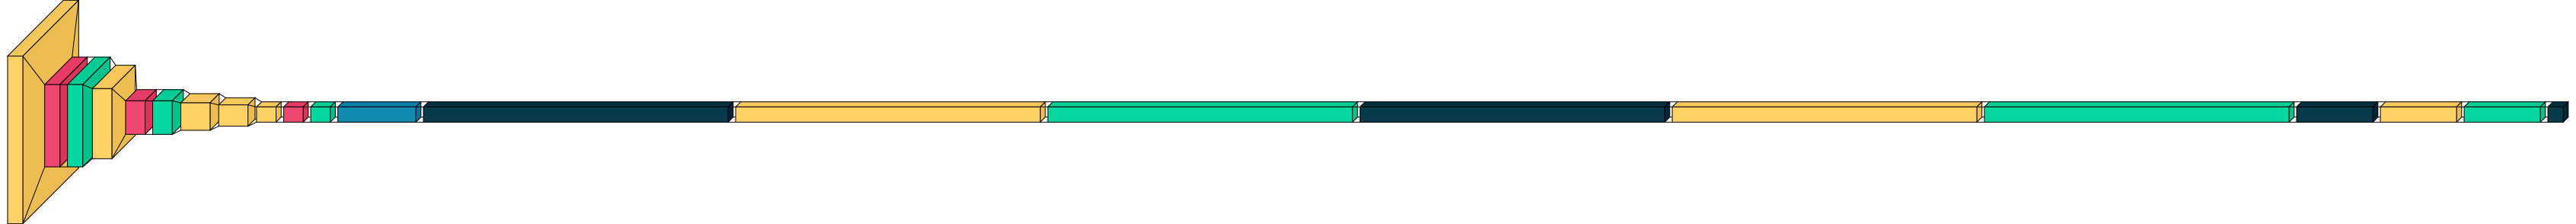

In [22]:
# Grafica del modelo generado
visualkeras.layered_view(model)

Observamos la distribución de las capas que conforman el modelo CNN planteado.<br>
Las capas convolucionales estan representadas por el color amarillo <br>
Las capas max pooling estan representadas por el color fuxia<br>
El proceso de normalización esta representado por el turqueza<br>
La capas de densidad se encuentran representadas por el color azul<br>
El proceso de regularización dropout se representa por el colo azul marino<br>

## Compilación del modelo CNN

In [23]:
# Compilamos el modelo
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

## Entrenamiento del modelo

In [32]:
#Marca de tiempo
%time
# Entrenamiento del modelo
history = model.fit(X_train, train_labels, epochs=100, validation_split=0.2, callbacks= [es])

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs
Epoch 1/100
24/24 [==============================] - 1s 49ms/step - loss: 0.1946 - accuracy: 0.9271 - val_loss: 1.1107 - val_accuracy: 0.6510
Epoch 2/100
24/24 [==============================] - 1s 42ms/step - loss: 0.1799 - accuracy: 0.9219 - val_loss: 1.9613 - val_accuracy: 0.6979
Epoch 3/100
24/24 [==============================] - 1s 39ms/step - loss: 0.2031 - accuracy: 0.9284 - val_loss: 2.7837 - val_accuracy: 0.6094
Epoch 4/100
24/24 [==============================] - 1s 40ms/step - loss: 0.2684 - accuracy: 0.9076 - val_loss: 3.0090 - val_accuracy: 0.5729
Epoch 5/100
24/24 [==============================] - 1s 42ms/step - loss: 0.2279 - accuracy: 0.9102 - val_loss: 0.9837 - val_accuracy: 0.7240
Epoch 6/100
24/24 [==============================] - 1s 40ms/step - loss: 0.1291 - accuracy: 0.9492 - val_loss: 1.1549 - val_accuracy: 0.7604
Epoch 7/100
24/24 [==============================] - 1s 40ms/step - loss: 0.1139 - a

## Exportación del modelo entrenado

In [33]:
# almacenamos el modelo
convert = tf.lite.TFLiteConverter.from_keras_model(model)
# Convertimos el modelo a tflite
tflite_model = convert.convert()

# Generamos el archivo del modelo
with open("model_prueba.tflite", 'wb') as f:
    f.write(tflite_model)

## Evaluación del modelo

In [34]:
# Evaluamos el modelo
loss, accuracy = model.evaluate(X_test, test_labels)
# Mostramos los paquetes perdidos y el accuracy
print(loss,accuracy)

8/8 [==============================] - 0s 22ms/step - loss: 1.5530 - accuracy: 0.7917
1.5529754161834717 0.7916666865348816


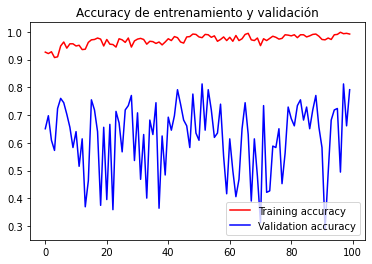

<Figure size 432x288 with 0 Axes>

In [35]:
# Obtenemos el accuracy del modelo
accuracy = history.history['accuracy']
# Obtenemos el accuracy de validación
validation_accuracy = history.history['val_accuracy']
# Determinamos los puntos de graficación
epochs = range(len(accuracy))
# Graficamos la metrica del accuracy
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
# Graficamos la metrica del accuracy de validación
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
# Asignamos el titulo del gráfico
plt.title('Accuracy de entrenamiento y validación')
# Asignamos la legenda del grafico
plt.legend(loc=0)
# Creamos la figura
plt.figure()
# Mostramos la figura
plt.show()

In [36]:
# Obtenemos la predicción del modelo
Y_pred = model.predict(X_test)
# Convertimos las clases predichas en un vector
Y_pred_classes = np.argmax(Y_pred,axis = 1)

8/8 [==============================] - 0s 19ms/step


In [37]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, Y_pred_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels, Y_pred_classes, average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, Y_pred_classes, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, Y_pred_classes, average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.791667
Precision: 0.791667
Recall: 0.791667
F1 score: 0.791667


## Predicción mediante el modelo entrenado

In [38]:
# Enviamos los datos de predicción
pred = model.predict(X_test)
# Tamaño de las predicciones
pred.shape

8/8 [==============================] - 0s 19ms/step


(240, 26)

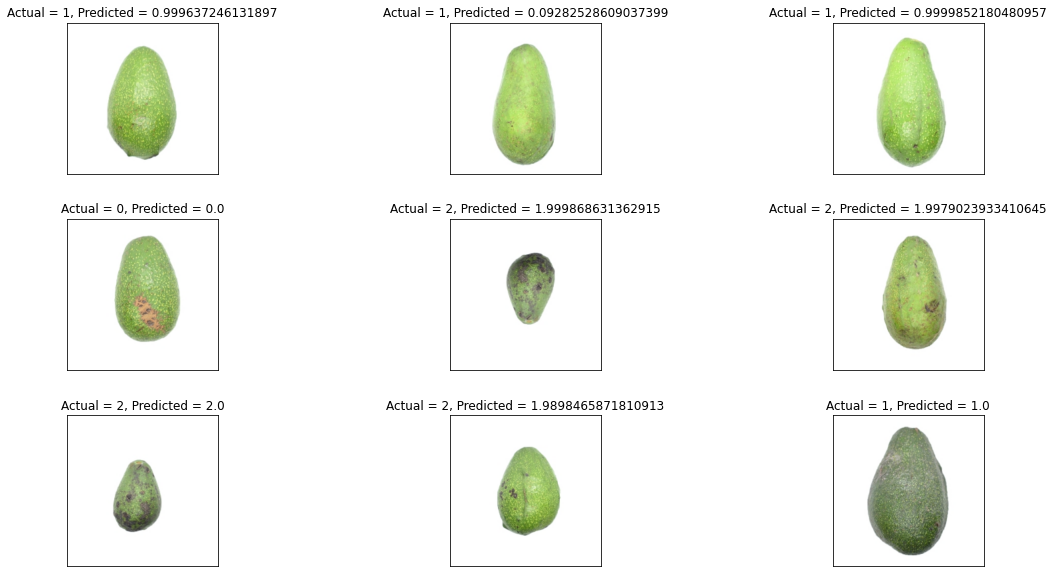

In [39]:
# Definir el tamaño de las figuras
plt.figure(1 , figsize = (19 , 10))
# Definimos un contador
n = 0 
# Bucle para mostrar las imagenes
for i in range(9):
    # Incrementamos el contador
    n += 1 
    # Obtenemos una imagen aleatoria
    r = np.random.randint( 0, X_test.shape[0], 1)
    # Establecemos la forma de presentar las imagenes
    plt.subplot(3 , 3 , n)
    # Ajustamos la forma de mostrar las imagenes
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    # obtenemos la imagen actual para mostrar
    plt.imshow(X_test[r[0]])
    # Asignamos las etiquetas
    plt.title('Actual = {}, Predicted = {}'.format(test_labels[r[0]] , test_labels[r[0]]*pred[r[0]][test_labels[r[0]]]) )
    # Establecemos la medida x, y
    plt.xticks([]) , plt.yticks([])

# Mostramos la gráfica
plt.show()

## Análisis de resultados

El proceso de entrenamiento requirio una cantidad de tiempo relativamente largo alcanzando un tiempo de 4 horas. Mediante el entrenamiento con más de 2000 imagenes de 3 tipos de enfermedades que posee el aguacate, obtuvimos un accurracy de 0.79, siendo un resultado deseable para la clasificación de enfermedades que tiene el aguacate por medio de imagenes, como se ve reflejado durante las pruebas realizadas con más de 500 images.